In [ ]:
#carga de librerias
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [ ]:
#Dar acceso al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#leer lso datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep learning/LTSM_Accc/datos/IPGAPB.csv')
print(df.shape)

(59, 8)


In [ ]:
#tomal la columna de open para ahcer predicciones
train_data = pd.to_datetime(df['Date'])
cols = list(df)[3:4] 
cols

['Open']

In [ ]:
#toma las columnas que tiene cols y a todo lo trasfotma a float  
df_train = df[cols].astype('float')
print(df_train)
print(type(df_train))
print(len(df_train))

      Open
0   282.66
1   284.21
2   287.50
3   287.79
4   290.01
5   286.75
6   285.55
7   281.42
8   282.22
9   281.57
10  287.02
11  280.00
12  281.94
13  282.92
14  285.38
15  276.06
16  267.38
17  275.00
18  270.86
19  268.41
20  269.80
21  282.96
22  285.59
23  287.12
24  287.00
25  288.06
26  300.89
27  298.65
28  303.37
29  300.50
30  303.83
31  305.63
32  309.84
33  310.55
34  312.70
35  303.01
36  309.00
37  286.57
38  288.10
39  287.16
40  297.79
41  293.85
42  292.51
43  280.86
44  278.88
45  265.11
46  261.43
47  266.72
48  271.51
49  267.38
50  270.70
51  280.80
52  283.20
53  275.37
54  288.74
55  296.97
56  297.04
57  306.42
58  303.10
<class 'pandas.core.frame.DataFrame'>
59


In [ ]:
#normalizando el conjunto de datos
scaler = StandardScaler()
scaler = scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)
print("df_train_scaled.shape: ", df_train_scaled.shape)
print("df_train_scaled type: ", type(df_train_scaled))
#print("df_train_scaled: ", df_train_scaled)

df_train_scaled.shape:  (59, 1)
df_train_scaled type:  <class 'numpy.ndarray'>


In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1   #dias en un futuro a predecir basado en el pasado
n_past = 5  #cuanto dias va tomar encuenta del pasado para n_future

In [ ]:
for i in range(n_past, len(df_train_scaled) - n_future +1):
    #toma los primeros cinco los añade conjunto (5,1) a Xtrain incrementa en 1
    #y ahora toma otros 5 y añande a xtrain 
    trainX.append(df_train_scaled[i - n_past:i, 0:df_train.shape[1]])
    #primeros 5, predice el valor que es 5+1 y ese es la 'y' para label 
    trainY.append(df_train_scaled[i + n_future - 1:i + n_future, 0])
trainX, trainY = np.array(trainX), np.array(trainY)

#print("datos: ", trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (54, 5, 1).
trainY shape == (54, 1).


In [ ]:
# definor el modelos con layers LSTM

model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adamax', loss='mse')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 5, 128)            66560     
                                                                 
 lstm_51 (LSTM)              (None, 5, 64)             49408     
                                                                 
 lstm_52 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Entrenamiento
history = model.fit(trainX, trainY, epochs=210, batch_size=8, validation_split=0.15, verbose=0)

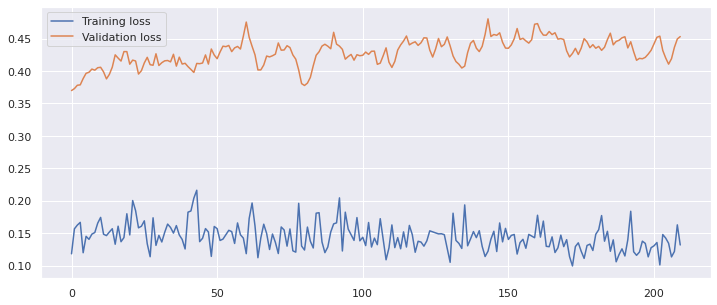

In [ ]:
#Grafica de history del entrenamiento
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#nfute dias del for para
# nfut son predichos no subir mas de 5 dias
nfut = 3
n_past = 31
n_days_for_prediction = 30 # Vamos a predecir los ultimos 3 dias
predict_period_dates = pd.date_range(list(train_data)[-n_past], periods=n_days_for_prediction + nfut, freq=us_bd).tolist()
print("periodo de fechas a predecir: ", predict_period_dates)

prediction = model.predict(trainX[-n_days_for_prediction:]) 
print("Forma predccion\n", prediction.shape)
#print("Resulado prediccion", prediction)
print("tipo", type(prediction))
print("dimencion: ", prediction.ndim)
#print("ultimos datos\n", df)

periodo de fechas a predecir:  [Timestamp('2022-02-11 00:00:00', freq='C'), Timestamp('2022-02-14 00:00:00', freq='C'), Timestamp('2022-02-15 00:00:00', freq='C'), Timestamp('2022-02-16 00:00:00', freq='C'), Timestamp('2022-02-17 00:00:00', freq='C'), Timestamp('2022-02-18 00:00:00', freq='C'), Timestamp('2022-02-22 00:00:00', freq='C'), Timestamp('2022-02-23 00:00:00', freq='C'), Timestamp('2022-02-24 00:00:00', freq='C'), Timestamp('2022-02-25 00:00:00', freq='C'), Timestamp('2022-02-28 00:00:00', freq='C'), Timestamp('2022-03-01 00:00:00', freq='C'), Timestamp('2022-03-02 00:00:00', freq='C'), Timestamp('2022-03-03 00:00:00', freq='C'), Timestamp('2022-03-04 00:00:00', freq='C'), Timestamp('2022-03-07 00:00:00', freq='C'), Timestamp('2022-03-08 00:00:00', freq='C'), Timestamp('2022-03-09 00:00:00', freq='C'), Timestamp('2022-03-10 00:00:00', freq='C'), Timestamp('2022-03-11 00:00:00', freq='C'), Timestamp('2022-03-14 00:00:00', freq='C'), Timestamp('2022-03-15 00:00:00', freq='C'), 

In [ ]:
#en base al resultado se toma y se añade un dia mas a la lista
predmas = trainX[-n_days_for_prediction:]
predmas.shape
for i in range(0, nfut):
  x = predmas[-1:]
  x2 = np.array([[ [x[0][1][0]], [x[0][2][0]], [x[0][3][0]], [x[0][4][0]], [prediction[0][0]] ]])
  predmas = np.append(predmas, x2, axis=0)
  prediction = model.predict(predmas)

predmas.shape

(33, 5, 1)

In [ ]:
prediction_copies = np.repeat(prediction, df_train.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
print(len(y_pred_future))
# convertimos a fecha para visualziar
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
print(df_forecast)
sns.set(rc={'figure.figsize':(12,5)})
original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-09-20'] #'2021-09-20'

33
         Date        Open
0  2022-02-11  302.056091
1  2022-02-14  301.718018
2  2022-02-15  305.072754
3  2022-02-16  308.286591
4  2022-02-17  308.614594
5  2022-02-18  312.484772
6  2022-02-22  307.364105
7  2022-02-23  306.594055
8  2022-02-24  289.406860
9  2022-02-25  289.349915
10 2022-02-28  288.283325
11 2022-03-01  294.191223
12 2022-03-02  295.103943
13 2022-03-03  293.148865
14 2022-03-04  289.765930
15 2022-03-07  275.622070
16 2022-03-08  265.947235
17 2022-03-09  263.381683
18 2022-03-10  264.673218
19 2022-03-11  267.754547
20 2022-03-14  268.473206
21 2022-03-15  285.568481
22 2022-03-16  288.007263
23 2022-03-17  288.172577
24 2022-03-18  285.533447
25 2022-03-21  284.140106
26 2022-03-22  289.762390
27 2022-03-23  291.951874
28 2022-03-24  294.283844
29 2022-03-25  305.237457
30 2022-03-28  304.455017
31 2022-03-29  302.572449
32 2022-03-30  304.892151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


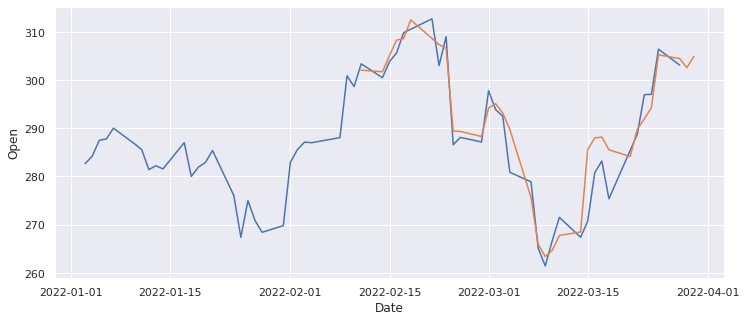

In [ ]:
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


El dia va abrir con :  303.01224


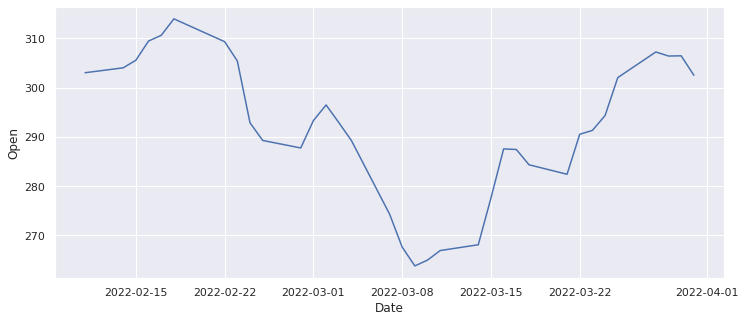

In [ ]:
sns.lineplot(df_forecast['Date'], df_forecast['Open'])
print("El dia va abrir con : ", y_pred_future[-(n_days_for_prediction-n_past)-1])